In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
# Read in Kaggle top 100 ranked Amazon books by year
amazon_ranks = pd.read_csv('amazon_bs_20102020.csv')

In [3]:
# Read in dataframe to see the most reviewed books between 2012-2015
most_reviewed = pd.read_csv('2ndpass_reviewcounts_30.tsv', sep='\t', quoting=csv.QUOTE_NONE)

In [27]:
amazon_ranks.head()

,Year,Rank,Book_Title,Author,Rating,Num_Customers_Rated,Price
0,2010,1,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.7,8475,17.24
1,2010,2,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,11516,9.99
2,2010,3,Decision Points,George W. Bush,4.6,2201,17.80
3,2010,4,The Help,Kathryn Stockett,4.8,14772,14.97
4,2010,5,The Girl Who Played with Fire (Millennium Series),Stieg Larsson,4.7,7949,0.02


In [28]:
amazon_ranks.describe()

,Year,Rank,Rating,Num_Customers_Rated,Price
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,2015.001828,50.379342,4.631444,14013.101463,10.850951
std,3.167769,28.831618,0.216768,14303.567366,11.865798
min,2010.000000,1.000000,3.300000,4.000000,0.010000
25%,2012.000000,25.250000,4.500000,4489.500000,2.750000
50%,2015.000000,50.000000,4.700000,10378.000000,8.980000
75%,2018.000000,75.000000,4.800000,18024.750000,15.800000
max,2020.000000,100.000000,4.900000,126619.000000,152.000000


In [29]:
amazon_ranks['Year'].value_counts()

2020    100
2019    100
2018    100
2015    100
2014    100
2013    100
2010    100
2017     99
2012     99
2011     99
2016     97
Name: Year, dtype: int64

In [50]:
# Top 10 reviewed books on amazon between 2012 and 2015
pd.set_option('display.max_colwidth', None)
most_reviewed.head(10)

,Title,Count
0,Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series),5024
1,Fifty Shades Trilogy (Fifty Shades of Grey / Fifty Shades Darker / Fifty Shades Freed),4451
2,Jesus Calling: Enjoying Peace in His Presence,4403
3,"Unbroken: A World War II Story of Survival, Resilience, and Redemption",4114
4,Rush Revere and the Brave Pilgrims: Time-Travel Adventures with Exceptional Americans,3866
5,Proof of Heaven: A Neurosurgeon's Journey into the Afterlife,3780
6,Gone Girl,3463
7,The Fault in Our Stars,3292
8,The Harbinger: The Ancient Mystery that Holds the Secret of America's Future,2902
9,Killing Patton: The Strange Death of World War II's Most Audacious General (Bill O'Reilly's Killing Series),2608


In [30]:
first30 = pd.read_csv('first30_reviews.tsv', sep='\t', quoting=csv.QUOTE_NONE)

In [31]:
first30.shape

(34194, 61)

In [32]:
first30.columns

Index(['Title', 'Date_1', 'Review_1', 'Date_2', 'Review_2', 'Date_3',
       'Review_3', 'Date_4', 'Review_4', 'Date_5', 'Review_5', 'Date_6',
       'Review_6', 'Date_7', 'Review_7', 'Date_8', 'Review_8', 'Date_9',
       'Review_9', 'Date_10', 'Review_10', 'Date_11', 'Review_11', 'Date_12',
       'Review_12', 'Date_13', 'Review_13', 'Date_14', 'Review_14', 'Date_15',
       'Review_15', 'Date_16', 'Review_16', 'Date_17', 'Review_17', 'Date_18',
       'Review_18', 'Date_19', 'Review_19', 'Date_20', 'Review_20', 'Date_21',
       'Review_21', 'Date_22', 'Review_22', 'Date_23', 'Review_23', 'Date_24',
       'Review_24', 'Date_25', 'Review_25', 'Date_26', 'Review_26', 'Date_27',
       'Review_27', 'Date_28', 'Review_28', 'Date_29', 'Review_29', 'Date_30',
       'Review_30'],
      dtype='object')

In [33]:
az_ranks = amazon_ranks[['Book_Title', 'Year', 'Rank', 'Rating']]

In [34]:
df = first30.merge(az_ranks, how='left', left_on='Title', right_on='Book_Title')

In [35]:
df['Rank'].unique()

array([ nan,  56.,  47.,  95.,  93.,  19.,  84.,  89.,  94.,  17.,  53.,
        40.,  13.,  34.,  97.,  91.,  73.,  96.,  11.,  20.,  35.,  29.,
        76.,  38.,  10.,  28.,  41.,   8.,  55.,  49.,  25.,  62.,  45.,
        39.,  99.,  68.,  59.,  48.,  31.,   3.,  92.,  36.,  90.,   7.,
        79.,  61.,  58.,  78.,  52.,  66.,  87.,  23.,  42.,  64.,  22.,
        70.,  15.,  65.,  33.,  69.,  81.,  12.,  74.,   5.,  75.,  85.,
        57.,  86.,  80.,  51.,  71.,   2.,  83.,   6.,  72.,   1.,  67.,
        32.,   9.,  63.,  88.,  46.,  30.,  60., 100.,  24.,  98.,  26.,
        18.,  16.,  44.,  27.,  43.,  82.,  21.,  77.,  37.,   4.,  14.,
        50.,  54.])

In [36]:
df[df['Rank'] == 1].head()

,Title,Date_1,Review_1,Date_2,Review_2,Date_3,Review_3,Date_4,Review_4,Date_5,...,Date_28,Review_28,Date_29,Review_29,Date_30,Review_30,Book_Title,Year,Rank,Rating
8928,Fifty Shades of Grey: Book One of the Fifty Sh...,2012-05-04,E L James is weaving her magic with the trilog...,2012-05-04,"Where to begin......Lets start with \\""in love...",2012-05-04,"I devoured this book, and then downloaded the ...",2012-05-04,This book was really rather stupid.<br />I had...,2012-05-04,...,2012-05-03,"Never, ever completed a book until I completed...",2012-05-03,This book was wonderful! I loved it! Could not...,2012-05-03,Magnificent and can't wait for the movies to b...,Fifty Shades of Grey: Book One of the Fifty Sh...,2012.0,1.0,3.9
9050,First 100 Words,2012-12-21,I bought this book originally because my 2 yea...,2012-12-20,I have a 2 year old who is slow to speak so ha...,2012-12-18,it is my grand daughter's first book and she l...,2012-12-16,Got this about 12 months and at 16 months my d...,2012-12-15,...,2012-06-16,I got this when my son was several months old....,2012-06-06,This book is adorable. It is a small padded bo...,2012-06-03,My daughter received this book for her 2nd bir...,First 100 Words,2015.0,1.0,4.7
22795,StrengthsFinder 2.0,2012-09-16,"After a quick online quiz, you get your top 5 ...",2012-09-14,I have used this over and over again for leade...,2012-09-06,Sir Ken Robinson tells a story in his famous T...,2012-09-04,I was actually told by several people in big n...,2012-08-30,...,2012-05-19,This item met my expectations based on the des...,2012-05-12,I have three years' experience with Strengths ...,2012-05-03,"As mentioned by others here, this book is nigh...",StrengthsFinder 2.0,2013.0,1.0,4.0
22796,StrengthsFinder 2.0,2012-09-16,"After a quick online quiz, you get your top 5 ...",2012-09-14,I have used this over and over again for leade...,2012-09-06,Sir Ken Robinson tells a story in his famous T...,2012-09-04,I was actually told by several people in big n...,2012-08-30,...,2012-05-19,This item met my expectations based on the des...,2012-05-12,I have three years' experience with Strengths ...,2012-05-03,"As mentioned by others here, this book is nigh...",StrengthsFinder 2.0,2014.0,1.0,4.0
26488,The Girl Who Kicked the Hornet's Nest (Millenn...,2013-02-20,I was sad when I was done reading this trilogy...,2013-02-15,I have read all the books. This was a great en...,2013-02-13,Terrific product. Shipped very quickly. Was ex...,2013-02-11,This is a great story I have reread many parts...,2013-02-07,...,2012-11-27,Best 3 books I have read in fiction. This was...,2012-11-27,"if your looking for any audio book, i employ y...",2012-09-28,The Book is great and arrived fast and in perf...,The Girl Who Kicked the Hornet's Nest (Millenn...,2010.0,1.0,4.7


In [37]:
df['isRanked'] = 1
df.loc[df['Rank'].isna(),'isRanked'] = 0

In [38]:
df.head()

,Title,Date_1,Review_1,Date_2,Review_2,Date_3,Review_3,Date_4,Review_4,Date_5,...,Review_28,Date_29,Review_29,Date_30,Review_30,Book_Title,Year,Rank,Rating,isRanked
0,"""Amazing Grace"" Embossed Bible / Book Cover",2013-04-04,this cover is very nice. great quality. arri...,2013-04-02,We measured my Bible and it should've been jus...,2013-03-07,"Today, I have already received this goods. It ...",2013-03-05,This is a very nice book cover. It fit the Bi...,2013-02-20,...,"Well made, leather and with a strong zipper. I...",2012-07-27,"Great light weight, faux leather case. Sized ...",2012-06-09,I was buying this as a gift for my sister for ...,NaN,NaN,NaN,NaN,0
1,"""Headhunter"" Hiring Secrets: The Rules of the ...",2015-06-12,Since I am new in the Executive Search industr...,2015-05-21,This book was extremely helpful during my job ...,2015-04-12,"Dear Mr. Freeman,<br /><br />Just recently I b...",2015-02-21,Helped me to secure an interview very quickly!,2015-02-18,...,Skip Freeman has written the BEST book ever wr...,2012-07-04,By for the best book on the market. Skip takes...,2012-05-16,This is a great book that's riveted my attenti...,NaN,NaN,NaN,NaN,0
2,"""I Heard You Paint Houses"": Frank ""The Irishma...",2013-10-13,This book is absolutely outstanding; a must re...,2013-10-05,This is a brilliant piece of work by Charles B...,2013-10-02,"I heard the author on a radio interview, the b...",2013-10-02,It's an ok book to pass the time if you're ext...,2013-09-10,...,"\\""I heard you Paint Houses\\"" is a book that ...",2012-11-19,If you have any interest in the Teamsters Unio...,2012-09-22,Some called it a guilty pleasure. In their la...,NaN,NaN,NaN,NaN,0
3,"""I Know the Plans"" Two-tone Bible / Book Cover...",2013-05-18,"Fits my, large print, Ignatius, revised standa...",2013-04-26,Great product! fits my King James medium size ...,2013-04-07,The case looks much better in person. I would ...,2013-03-26,This bible cover is amazing. It's 100% quality...,2013-03-22,...,The cover is very nice for the price. A little...,2012-09-11,This is a very beautiful Bible cover and I jus...,2012-09-05,This cover is durable and classy. Fits very we...,NaN,NaN,NaN,NaN,0
4,"""On Wings Like Eagles"" Two-tone Bible / Book C...",2014-01-22,good looking for a PU item. a little plastic y...,2014-01-20,This is a very cheap plastic material cover. I...,2013-12-14,My husband loves his! I wish I was a little mo...,2013-12-03,Beautiful cover and a great reminder of a wond...,2013-11-14,...,This is a really good Bible Cover. I bought it...,2012-11-19,Excellent product and in flashy design and col...,2012-10-27,My special guy was amazed at the quality of th...,NaN,NaN,NaN,NaN,0


In [39]:
df.describe()

,Year,Rank,Rating,isRanked
count,640.000000,640.000000,640.000000,34505.000000
mean,2013.821875,50.010937,4.610313,0.018548
std,2.829449,28.205509,0.218731,0.134924
min,2010.000000,1.000000,3.300000,0.000000
25%,2011.000000,27.000000,4.500000,0.000000
50%,2014.000000,48.000000,4.700000,0.000000
75%,2016.000000,74.000000,4.800000,0.000000
max,2020.000000,100.000000,4.900000,1.000000


In [40]:
df.shape

(34505, 66)

In [41]:
df['Total_Length'] = 0
for index, row in df.iterrows():
    rolling_sum = 0
    for i in range(1,31):
        name = "Review_" + str(i)
        rolling_sum += len(row[name])
    df.loc[index,'Total_Length'] = rolling_sum

In [42]:
df.head()

,Title,Date_1,Review_1,Date_2,Review_2,Date_3,Review_3,Date_4,Review_4,Date_5,...,Date_29,Review_29,Date_30,Review_30,Book_Title,Year,Rank,Rating,isRanked,Total_Length
0,"""Amazing Grace"" Embossed Bible / Book Cover",2013-04-04,this cover is very nice. great quality. arri...,2013-04-02,We measured my Bible and it should've been jus...,2013-03-07,"Today, I have already received this goods. It ...",2013-03-05,This is a very nice book cover. It fit the Bi...,2013-02-20,...,2012-07-27,"Great light weight, faux leather case. Sized ...",2012-06-09,I was buying this as a gift for my sister for ...,NaN,NaN,NaN,NaN,0,5834
1,"""Headhunter"" Hiring Secrets: The Rules of the ...",2015-06-12,Since I am new in the Executive Search industr...,2015-05-21,This book was extremely helpful during my job ...,2015-04-12,"Dear Mr. Freeman,<br /><br />Just recently I b...",2015-02-21,Helped me to secure an interview very quickly!,2015-02-18,...,2012-07-04,By for the best book on the market. Skip takes...,2012-05-16,This is a great book that's riveted my attenti...,NaN,NaN,NaN,NaN,0,15928
2,"""I Heard You Paint Houses"": Frank ""The Irishma...",2013-10-13,This book is absolutely outstanding; a must re...,2013-10-05,This is a brilliant piece of work by Charles B...,2013-10-02,"I heard the author on a radio interview, the b...",2013-10-02,It's an ok book to pass the time if you're ext...,2013-09-10,...,2012-11-19,If you have any interest in the Teamsters Unio...,2012-09-22,Some called it a guilty pleasure. In their la...,NaN,NaN,NaN,NaN,0,9826
3,"""I Know the Plans"" Two-tone Bible / Book Cover...",2013-05-18,"Fits my, large print, Ignatius, revised standa...",2013-04-26,Great product! fits my King James medium size ...,2013-04-07,The case looks much better in person. I would ...,2013-03-26,This bible cover is amazing. It's 100% quality...,2013-03-22,...,2012-09-11,This is a very beautiful Bible cover and I jus...,2012-09-05,This cover is durable and classy. Fits very we...,NaN,NaN,NaN,NaN,0,6379
4,"""On Wings Like Eagles"" Two-tone Bible / Book C...",2014-01-22,good looking for a PU item. a little plastic y...,2014-01-20,This is a very cheap plastic material cover. I...,2013-12-14,My husband loves his! I wish I was a little mo...,2013-12-03,Beautiful cover and a great reminder of a wond...,2013-11-14,...,2012-11-19,Excellent product and in flashy design and col...,2012-10-27,My special guy was amazed at the quality of th...,NaN,NaN,NaN,NaN,0,4804


In [43]:
# Total length of all 30 reviews for all books
df[['isRanked', 'Total_Length']].describe()

,isRanked,Total_Length
count,34505.000000,34505.000000
mean,0.018548,10138.892421
std,0.134924,7391.332507
min,0.000000,1245.000000
25%,0.000000,5896.000000
50%,0.000000,7890.000000
75%,0.000000,11790.000000
max,1.000000,135756.000000


In [44]:
# Total length of all 30 reveiws for only ranked books 
df[df['isRanked'] == 1]['Total_Length'].describe()

count      640.000000
mean     14851.140625
std       9954.277843
min       2512.000000
25%       7859.000000
50%      12682.500000
75%      18451.000000
max      83024.000000
Name: Total_Length, dtype: float64

In [45]:
# Total length of all 30 reviews for only not-ranked books
df[df['isRanked'] == 0]['Total_Length'].describe()

count     33865.000000
mean      10049.837679
std        7305.268929
min        1245.000000
25%        5869.000000
50%        7844.000000
75%       11641.000000
max      135756.000000
Name: Total_Length, dtype: float64

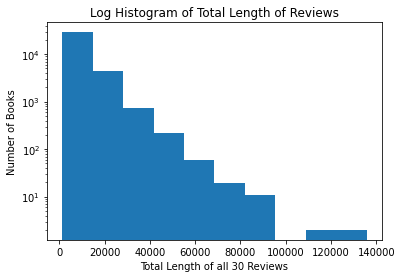

In [46]:
n, bins, patches = plt.hist(df['Total_Length'], log=True)
plt.xlabel('Total Length of all 30 Reviews')
plt.ylabel('Number of Books')
plt.title('Log Histogram of Total Length of Reviews')
plt.show()